In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Data set
Nous chargeons le jeu de données contenant les informations des voitures pour effectuer des analyses et des prédictions sur les prix.


In [4]:
data = pd.read_csv('Carvago.csv')

In [5]:
data.head()

,Mileage,First_registration,Power,Transmission,Fuel,Drive_type,Location,Vehicle_ID,Make,Body_color,...,Body,Doors,Seats,Consumption,CO2_emissions,Engine_capacity,Emission_class,Speeds,price,price_without_vat
0,58728km,7/2021,288 hp,Automatic,Hybrid,4x4,Germany,69422882.0,BMW,Blue,...,SUV / offroad,4/5 doors,5,NaN,NaN,1 998 ccm,Euro 6d,8.0,"€39,399","€32,561"
1,28000km,7/2023,201 hp,Automatic,Electric,4x2,Germany,69422881.0,Volkswagen,White,...,Hatchback,4/5 doors,5,NaN,NaN,NaN,NaN,NaN,"€32,999","€27,272"
2,85023km,9/2020,134 hp,Automatic,Electric,4x2,Netherlands,69422879.0,Opel,Grey,...,Hatchback,4/5 doors,5,16.8 kWh/100km,NaN,NaN,NaN,NaN,"€15,849","€13,098"
3,19044km,12/2022,89 hp,Manual,CNG,4x2,Italy,69422878.0,Seat,Black,...,SUV / offroad,4/5 doors,5,3.7 kg/100km,103 g/km,999 ccm,NaN,NaN,"€17,849","€14,751"
4,67514km,6/2017,259 hp,Automatic,Diesel,4x4,Germany,69422877.0,Volkswagen,Black,...,SUV / offroad,4/5 doors,5,6.9 l/100km,180 g/km,2 967 ccm,Euro 6,NaN,"€38,749",NaN


In [6]:
data.shape

(30000, 23)

# Delete duplicating lines
Nous supprimons les lignes dupliquées pour éviter les biais et les redondances dans les analyses ultérieures.


In [7]:
data = data.drop_duplicates()


In [8]:
data.shape

(23426, 23)

In [9]:
print(data.isnull().sum())


Mileage                   6
First_registration        6
Power                     6
Transmission              1
Fuel                      6
Drive_type                6
Location                  6
Vehicle_ID                6
Make                      6
Body_color              962
Type_of_finish         9910
Interior_color         2075
Interior_material      1228
Body                      6
Doors                   392
Seats                  2109
Consumption            3708
CO2_emissions          3430
Engine_capacity        1690
Emission_class         7536
Speeds                15566
price                     6
price_without_vat      8115
dtype: int64


### Suppression des colonnes non pertinentes
Nous supprimons les colonnes jugées non pertinentes pour la prédiction des prix des voitures, telles que des colonnes identifiants ou d'autres sans valeur explicative.


In [10]:
data_cleaned = data.drop(columns=['Vehicle_ID','Location','price_without_vat'])

### Suppression des colonnes avec beaucoup valeurs manquantes 

In [11]:
data_cleaned = data_cleaned.drop(columns=['Speeds', 'Type_of_finish'])


##### suppression des lignes avec un peut des valeurs manquantes:

In [12]:
data_cleaned = data_cleaned.dropna(subset=['Mileage','Doors','Body_color'])

In [13]:
print(data_cleaned.isnull().sum())

Mileage                  0
First_registration       0
Power                    0
Transmission             0
Fuel                     0
Drive_type               0
Make                     0
Body_color               0
Interior_color        1745
Interior_material     1014
Body                     0
Doors                    0
Seats                 1659
Consumption           3313
CO2_emissions         3125
Engine_capacity       1564
Emission_class        6694
price                    0
dtype: int64


In [14]:
len(data_cleaned)

22103

### Conversion et suppression des unités des colonnes
Nous convertissons les valeurs avec des unités (par ex., km ou L) en formats numériques standardisés pour faciliter les calculs et analyses.


In [15]:
# Suppression des unités 'km' de Mileage
data_cleaned['Mileage'] = (
    data_cleaned['Mileage']
    .astype(str)  # Convertit temporairement en chaîne pour traitement
    .str.replace('km', '', regex=False)  # Supprime 'km'
    .str.replace(',', '', regex=False)  # Supprime les virgules
    .str.strip()  # Supprime les espaces inutiles
)

# Convertit la colonne nettoyée en float
data_cleaned['Mileage'] = pd.to_numeric(data_cleaned['Mileage'], errors='coerce')


data_cleaned['Power'] = (
    data_cleaned['Power']
    .replace('NaN', np.nan)  # Remplacez les "NaN" textuels par np.nan
    .fillna(np.nan)          # Assurez-vous que les valeurs manquantes sont bien reconnues
    .str.replace('\xa0', '', regex=True)  # Supprimez les espaces insécables
    .str.replace('hp', '', regex=False)  # Supprimez ' hp'
    .astype(float)  # Convertissez en float
)
# Nettoyage et conversion de 'price'
data_cleaned['price'] = (
    data_cleaned['price']
    .astype(str)  # Convertit temporairement en chaîne pour traitement
    .str.replace('€', '', regex=False)  # Supprime le symbole €
    .str.replace(',', '', regex=False)  # Supprime les virgules (si présentes)
    .str.strip()  # Supprime les espaces inutiles
)
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')  # Convertit en float


data_cleaned['Engine_capacity'] = pd.to_numeric(
    data_cleaned['Engine_capacity']
    .str.replace('ccm', '', regex=False)
    .str.replace('\xa0', '', regex=False)
    .str.strip(),
    errors='coerce'
)
# Clean CO2_emissions column by removing 'g/km' and converting to numeric
data_cleaned['CO2_emissions'] = pd.to_numeric(
    data_cleaned['CO2_emissions']
    .str.replace('g/km', '', regex=False)
    .str.replace('\xa0', '', regex=False)
    .str.strip(),
    errors='coerce'
)

In [16]:
print(data_cleaned.dtypes)

Mileage                 int64
First_registration     object
Power                 float64
Transmission           object
Fuel                   object
Drive_type             object
Make                   object
Body_color             object
Interior_color         object
Interior_material      object
Body                   object
Doors                  object
Seats                  object
Consumption            object
CO2_emissions         float64
Engine_capacity       float64
Emission_class         object
price                   int64
dtype: object


In [17]:
data_cleaned.describe()

,Mileage,Power,CO2_emissions,Engine_capacity,price
count,22103.000000,22103.000000,18978.000000,20539.000000,2.210300e+04
mean,42991.907841,177.015925,131.297977,1719.167291,3.632184e+04
std,41275.541525,100.556857,43.525067,653.653018,3.783716e+04
min,0.000000,8.000000,5.000000,1.000000,2.899000e+03
25%,8500.000000,114.000000,109.000000,1300.000000,2.044900e+04
50%,30600.000000,148.000000,125.000000,1580.000000,2.839900e+04
75%,68600.500000,201.000000,149.000000,1984.000000,4.074900e+04
max,175000.000000,1002.000000,499.000000,6749.000000,2.454249e+06


###  supprimer les types des voitures qui ont pas un grand data

In [18]:
# Compter lignes par marque
make_counts = data_cleaned['Make'].value_counts()

# Afficher marques avec moins de 10 lignes
print("Marques avec moins de 10 lignes:")
print(make_counts[make_counts < 10])

# Filtrer le dataframe
data_cleaned = data_cleaned[~data_cleaned['Make'].isin(make_counts[make_counts < 10].index)]

# Vérifier résultat
print("\nNombre de lignes après filtrage:", len(data_cleaned))
print("\nNouvelle distribution des marques:")
print(data_cleaned['Make'].value_counts())

Marques avec moins de 10 lignes:
Make
RAM            9
Dodge          8
Aixam          6
GWM            6
Rolls-Royce    6
Cadillac       6
Alpina         5
Maxus          4
Genesis        4
McLaren        4
Ligier         4
BYD            3
Lotus          2
GMC            2
Alpine         1
Ineos          1
Isuzu          1
Chrysler       1
Infiniti       1
Mahindra       1
Microcar       1
Name: count, dtype: int64

Nombre de lignes après filtrage: 22027

Nouvelle distribution des marques:
Make
Volkswagen        3247
Mercedes-Benz     2386
BMW               1915
Audi              1876
Ford              1290
Škoda             1165
Opel              1049
Hyundai            821
Toyota             749
Renault            687
Peugeot            672
Volvo              625
Fiat               624
Kia                608
Seat               526
Citroën            373
Nissan             354
Porsche            336
Cupra              324
Jeep               292
Dacia              286
MINI           

### Standardisation de la consommation
Nous appliquons une standardisation sur la colonne `Consumption` pour uniformiser les valeurs et réduire les variations dues à différentes unités de mesure.


In [18]:
def standardize_consumption(row):
    consumption = row['Consumption']
    fuel_type = row['Fuel']
    
    # Convertir toutes les unités en L/100km
    try:
        # Si déjà un nombre, on suppose que c'est en L/100km
        if isinstance(consumption, (int, float)):
            return consumption
        
        # Nettoyage et extraction du nombre
        consumption = str(consumption).replace(',', '.').strip()
        
        # Conversion spécifique selon l'unité
        if 'kWh/100km' in consumption:
            # Conversion kWh/100km → L/100km (équivalent essence)
            value = float(consumption.replace(' kWh/100km', '').strip())
            return value * 0.6  # Approximation
        
        elif 'kg/100km' in consumption:
            # Conversion kg/100km → L/100km (pour véhicules hydrogène)
            value = float(consumption.replace(' kg/100km', '').strip())
            return value * 1.5  # Approximation
        
        elif 'l/100km' in consumption:
            return float(consumption.replace(' l/100km', '').strip())
        
        else:
            # Si format non reconnu, retourner NaN
            return np.nan
    
    except Exception:
        return np.nan

# Application de la standardisation
data_cleaned['Consumption_Standardized'] = data_cleaned.apply(standardize_consumption, axis=1)

In [19]:
data_cleaned = data_cleaned.drop(columns=['Consumption'])


In [20]:
data_cleaned

,Mileage,First_registration,Power,Transmission,Fuel,Drive_type,Make,Body_color,Interior_color,Interior_material,Body,Doors,Seats,CO2_emissions,Engine_capacity,Emission_class,price,Consumption_Standardized
0,58728,7/2021,288.0,Automatic,Hybrid,4x4,BMW,Blue,Black interior,Part leather interior,SUV / offroad,4/5 doors,5,NaN,1998.0,Euro 6d,39399,NaN
1,28000,7/2023,201.0,Automatic,Electric,4x2,Volkswagen,White,Grey interior,Cloth interior,Hatchback,4/5 doors,5,NaN,NaN,NaN,32999,NaN
2,85023,9/2020,134.0,Automatic,Electric,4x2,Opel,Grey,Black interior,Cloth interior,Hatchback,4/5 doors,5,NaN,NaN,NaN,15849,10.08
3,19044,12/2022,89.0,Manual,CNG,4x2,Seat,Black,Grey interior,Other interior material,SUV / offroad,4/5 doors,5,103.0,999.0,NaN,17849,5.55
4,67514,6/2017,259.0,Automatic,Diesel,4x4,Volkswagen,Black,Beige interior,Full leather interior,SUV / offroad,4/5 doors,5,180.0,2967.0,Euro 6,38749,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4000,10/2024,148.0,Manual,Petrol,4x2,Volkswagen,Grey,Grey interior,Cloth interior,SUV / offroad,4/5 doors,5,120.0,1498.0,Euro 6,40549,6.00
29996,5332,3/2023,129.0,Automatic,Petrol,4x2,Opel,Grey,Black interior,Cloth interior,SUV / offroad,4/5 doors,5,112.0,1199.0,NaN,23099,5.00
29997,5585,9/2023,473.0,Automatic,Petrol,4x2,Porsche,White,Other interior color,Other interior material,Coupe,2/3 doors,2,221.0,NaN,NaN,393399,10.10
29998,0,8/2024,129.0,Manual,Diesel,4x2,Renault,White,Grey interior,Cloth interior,Cargo VAN,4/5 doors,3,211.0,1997.0,Euro 6d,44599,8.10


In [21]:
print(data_cleaned.isnull().sum())

Mileage                        0
First_registration             0
Power                          0
Transmission                   0
Fuel                           0
Drive_type                     0
Make                           0
Body_color                     0
Interior_color              1742
Interior_material           1011
Body                           0
Doors                          0
Seats                       1652
CO2_emissions               3072
Engine_capacity             1551
Emission_class              6664
price                          0
Consumption_Standardized    3264
dtype: int64


In [22]:

columns_to_check = [
    'Interior_color', 
    'Interior_material', 
    'Seats', 
    'CO2_emissions', 
    'Engine_capacity', 
    'Emission_class'
]

# Display unique values with proper error handling
for column in columns_to_check:
    try:
        print(f"\n{column} unique values:")
        print(data_cleaned[column].value_counts(dropna=False))
        print("-" * 50)
    except KeyError:
        print(f"Column {column} not found in dataframe")
        print("-" * 50)

# Show all column names in dataframe for reference
print("\nAvailable columns in dataframe:")
print(data_cleaned.columns.tolist())


Interior_color unique values:
Interior_color
Black interior          12000
Other interior color     6054
Grey interior            1780
NaN                      1742
Brown interior            254
Beige interior            197
Name: count, dtype: int64
--------------------------------------------------

Interior_material unique values:
Interior_material
Cloth interior             8857
Other interior material    4350
Full leather interior      3963
Part leather interior      2715
NaN                        1011
Alcantara interior          975
Velour interior             156
Name: count, dtype: int64
--------------------------------------------------

Seats unique values:
Seats
5      17059
NaN     1652
4       1444
7        647
3        491
2        437
6        109
8+       103
9+        81
12+        2
1          2
Name: count, dtype: int64
--------------------------------------------------

CO2_emissions unique values:
CO2_emissions
NaN      3072
113.0     450
108.0     423
116.0     

In [23]:
# 1. Fill Interior Material and Color
data_cleaned['Interior_material'] = data_cleaned['Interior_material'].fillna('Cloth interior')  # most common
data_cleaned['Interior_color'] = data_cleaned['Interior_color'].fillna('Black interior')  # most common



In [24]:
# Show original distribution
print("Original Seats distribution in data_cleaned:")
print(data_cleaned['Seats'].value_counts(dropna=False))

# Fill missing values with '5'
data_cleaned['Seats'] = data_cleaned['Seats'].fillna('5')

# Show final distribution
print("\nCleaned Seats distribution:")
print(data_cleaned['Seats'].value_counts())

# Verify no missing values remain
print("\nMissing values:", data_cleaned['Seats'].isnull().sum())

Original Seats distribution in data_cleaned:
Seats
5      17059
NaN     1652
4       1444
7        647
3        491
2        437
6        109
8+       103
9+        81
12+        2
1          2
Name: count, dtype: int64

Cleaned Seats distribution:
Seats
5      18711
4       1444
7        647
3        491
2        437
6        109
8+       103
9+        81
12+        2
1          2
Name: count, dtype: int64

Missing values: 0


In [25]:
# Méthode 1 : Extraire l'année avec str.split
data_cleaned['Year'] = data_cleaned['First_registration'].str.split('/').str[1].astype(int)

# Méthode 2 : Convertir en datetime puis extraire l'année
data_cleaned['Year'] = pd.to_datetime(data_cleaned['First_registration'], format='%m/%Y').dt.year


In [26]:
data_cleaned = data_cleaned.drop(columns=['First_registration'])

In [27]:
data_cleaned.head()

,Mileage,Power,Transmission,Fuel,Drive_type,Make,Body_color,Interior_color,Interior_material,Body,Doors,Seats,CO2_emissions,Engine_capacity,Emission_class,price,Consumption_Standardized,Year
0,58728,288.0,Automatic,Hybrid,4x4,BMW,Blue,Black interior,Part leather interior,SUV / offroad,4/5 doors,5,NaN,1998.0,Euro 6d,39399,NaN,2021
1,28000,201.0,Automatic,Electric,4x2,Volkswagen,White,Grey interior,Cloth interior,Hatchback,4/5 doors,5,NaN,NaN,NaN,32999,NaN,2023
2,85023,134.0,Automatic,Electric,4x2,Opel,Grey,Black interior,Cloth interior,Hatchback,4/5 doors,5,NaN,NaN,NaN,15849,10.08,2020
3,19044,89.0,Manual,CNG,4x2,Seat,Black,Grey interior,Other interior material,SUV / offroad,4/5 doors,5,103.0,999.0,NaN,17849,5.55,2022
4,67514,259.0,Automatic,Diesel,4x4,Volkswagen,Black,Beige interior,Full leather interior,SUV / offroad,4/5 doors,5,180.0,2967.0,Euro 6,38749,6.90,2017


### Suppression de tout lignes qui ont pas le type de carburant

In [28]:
data_cleaned = data_cleaned[data_cleaned['Fuel'] != 'Other fuel type']

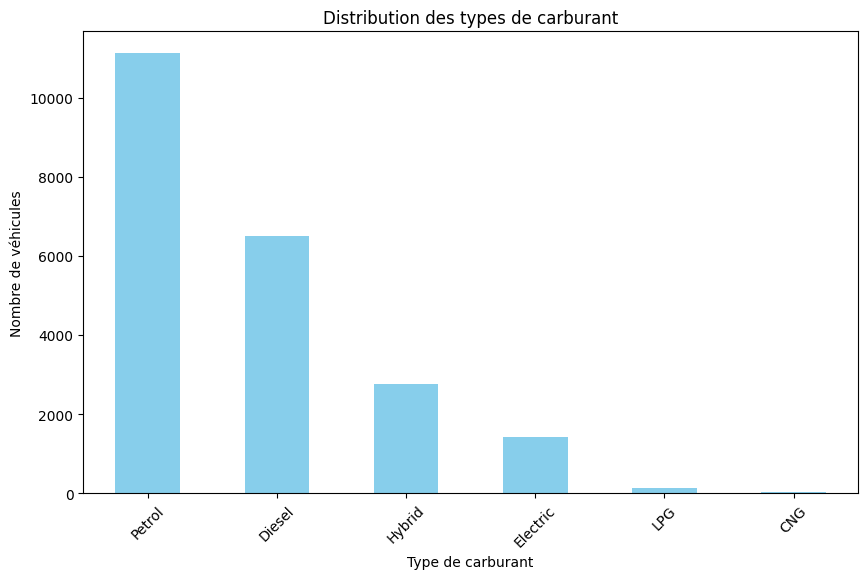

Fuel
Petrol      11115
Diesel       6514
Hybrid       2768
Electric     1421
LPG           130
CNG            38
Name: count, dtype: int64


In [29]:
import matplotlib.pyplot as plt

# Distribution des types de carburant
fuel_distribution = data_cleaned['Fuel'].value_counts()

# Affichage de la distribution
plt.figure(figsize=(10, 6))
fuel_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution des types de carburant')
plt.xlabel('Type de carburant')
plt.ylabel('Nombre de véhicules')
plt.xticks(rotation=45)
plt.show()

# Affichage des valeurs
print(fuel_distribution)

## On remarque que les voitures avec le type de carburant LPG et CNG sont trés rares donc on les supprimmes de notre dataframe pour réduire le risque de Surapprentissage .


In [39]:
# Suppression des voitures avec le type de carburant LPG et CNG
data_cleaned = data_cleaned[~data_cleaned['Fuel'].isin(['LPG', 'CNG'])]

# Analyse sur Emission-class pour remplir les valeurs NAN :

## on prend on considération l'année d'enregistrement

Emission Classes by Registration Year:
Emission_class  Euro 1  Euro 4  Euro 5  Euro 6  Euro 6c  Euro 6d  Euro 6d-TEMP
Year                                                                          
2011                 0       1      44       0        0        0             0
2012                 0       1      61       1        0        0             0
2013                 0       1      83       5        0        0             2
2014                 0       1      88      32        0        0             0
2015                 0       0      51     106        0        0             1
2016                 0       0      16     202        3        3             2
2017                 0       0       9     303        2        3             4
2018                 0       0      12     492       11       19            78
2019                 1       0      10     536       11       78           537
2020                 0       0      18     878        9      371           895
2021         

<Figure size 1200x600 with 0 Axes>

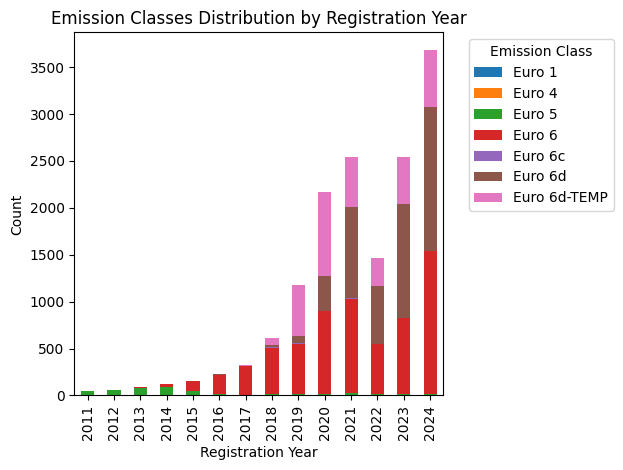

In [40]:
# Get unique emissions classes by registration year
emission_by_year = pd.crosstab(data_cleaned['Year'], data_cleaned['Emission_class'])

# Sort by index (year) for better readability
emission_by_year = emission_by_year.sort_index()

# Display results
print("Emission Classes by Registration Year:")
print(emission_by_year)

# Optional: Visualize with a stacked bar chart
plt.figure(figsize=(12, 6))
emission_by_year.plot(kind='bar', stacked=True)
plt.title('Emission Classes Distribution by Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.legend(title='Emission Class', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## On prend on considération l'année de fabrication et le type de carburant

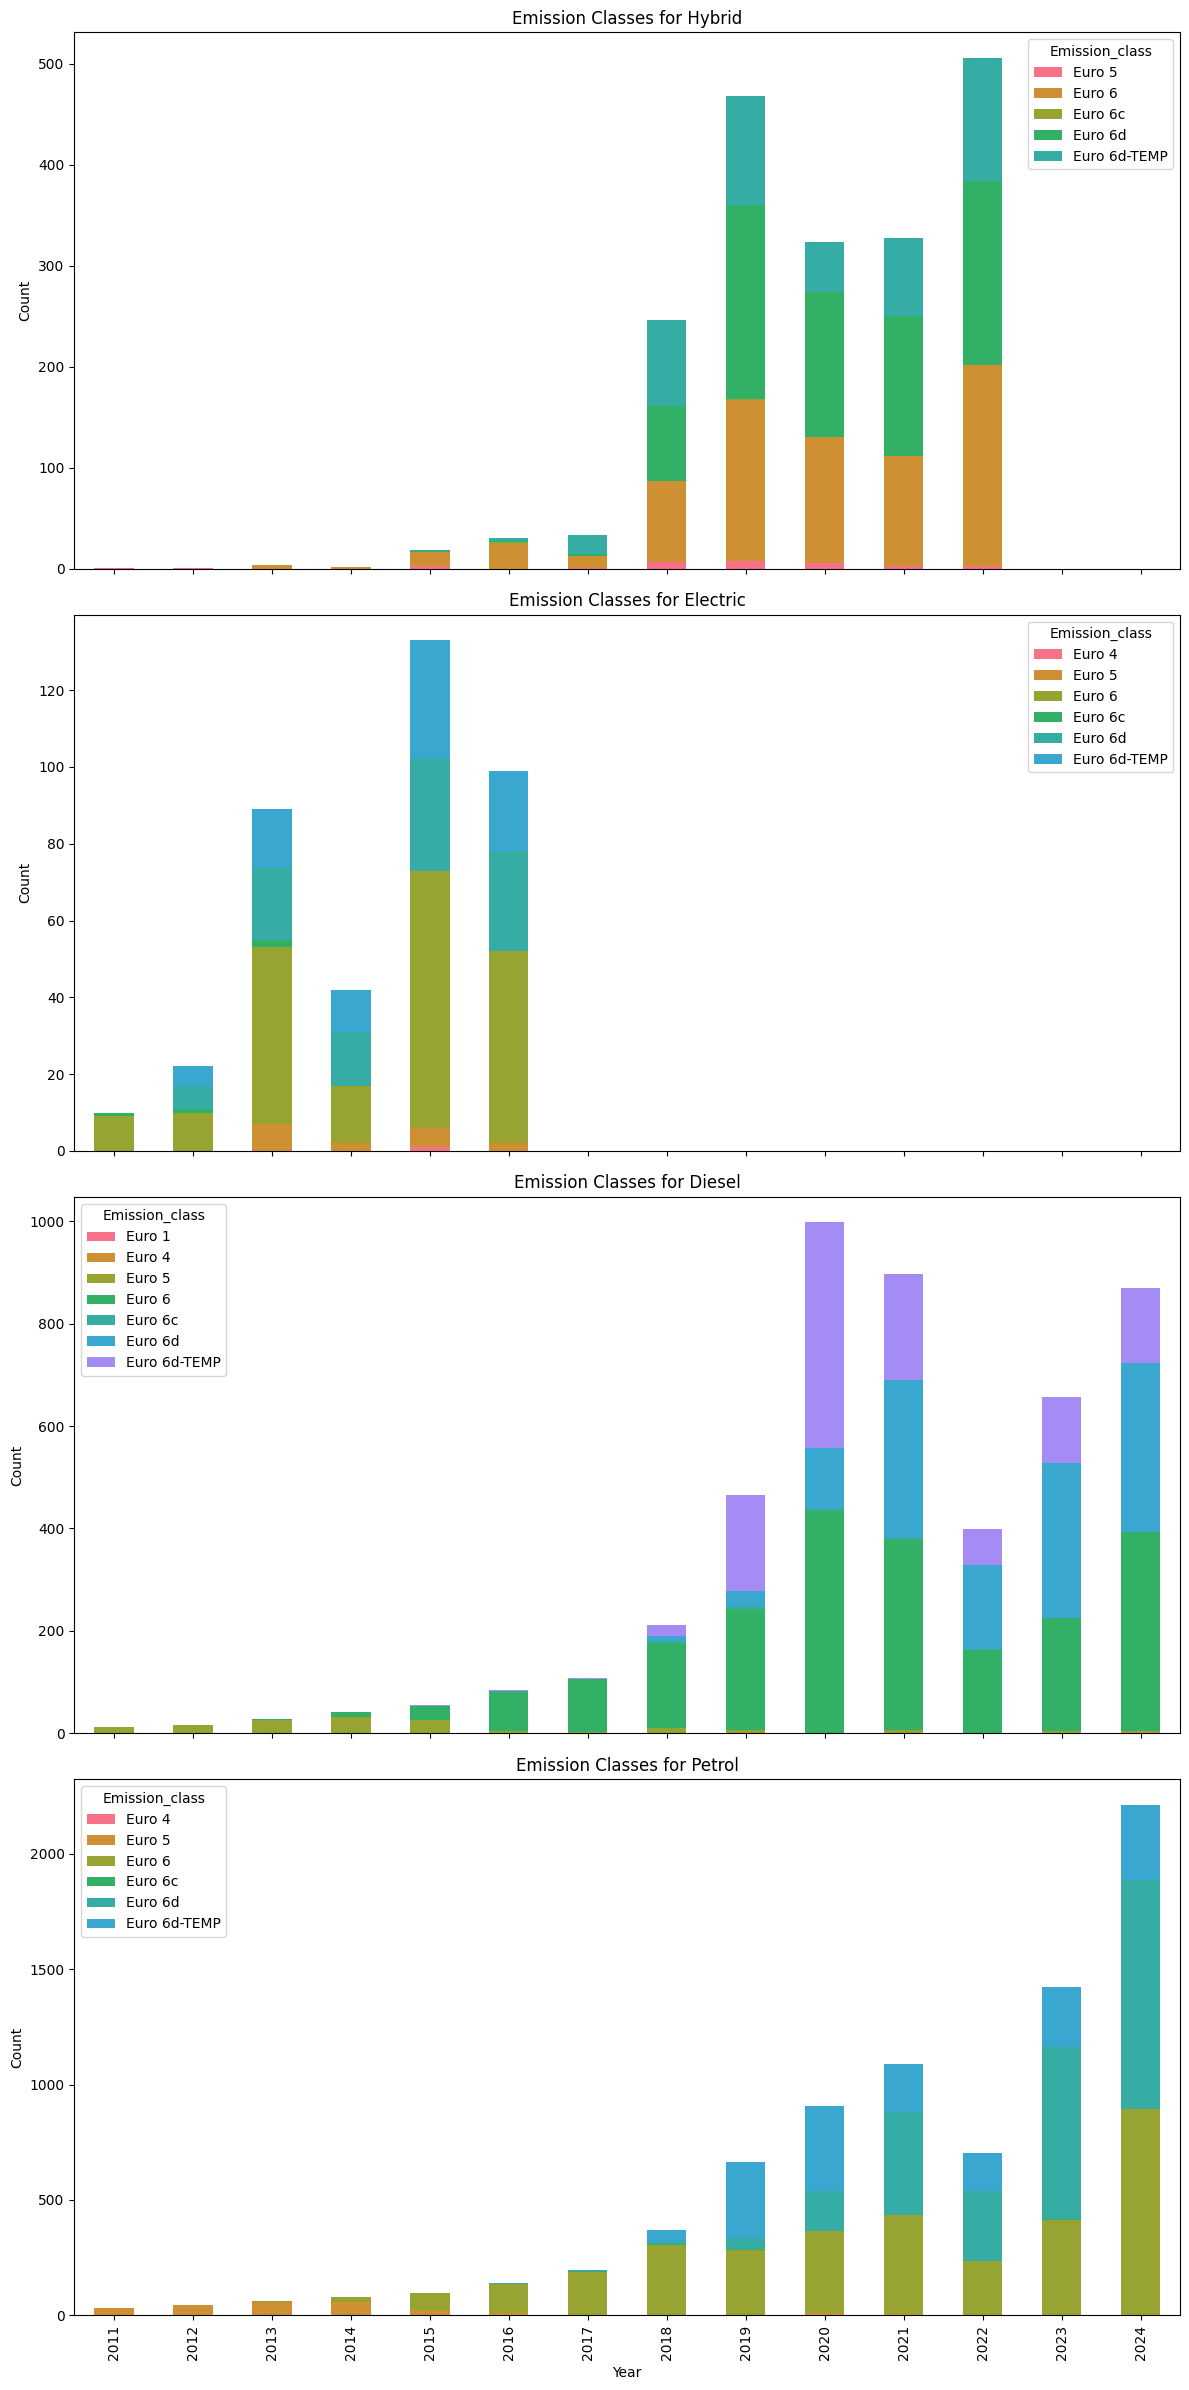

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Définir une palette de couleurs
colors = sns.color_palette("husl", 8)


# Création d'une figure avec des sous-graphiques pour chaque type de carburant
fuels = data_cleaned['Fuel'].unique()
n_fuels = len(fuels)
fig, axes = plt.subplots(n_fuels, 1, figsize=(12, 6 * n_fuels), sharex=True)

# Tracer la distribution de Emission_class en fonction de Year et Fuel
for idx, fuel in enumerate(fuels):
    fuel_data = data_cleaned[data_cleaned['Fuel'] == fuel]
    fuel_emission = pd.crosstab(fuel_data['Year'], fuel_data['Emission_class'])
    
    # Plot
    fuel_emission.plot(
        kind='bar',
        stacked=True,
        ax=axes[idx] if n_fuels > 1 else axes,
        title=f'Emission Classes for {fuel}',
        color=colors
    )
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### Remarques 
on peut voir que les voitures electric euro 6 est la classe haute frequente (on remplie les valeurs nuls pour les voitures electric avec euro 6)

C:\Users\Iliass\AppData\Local\Temp\ipykernel_9984\2804081550.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i + width/2, nan_by_fuel['NaN_Count'][i], f'{v}%',


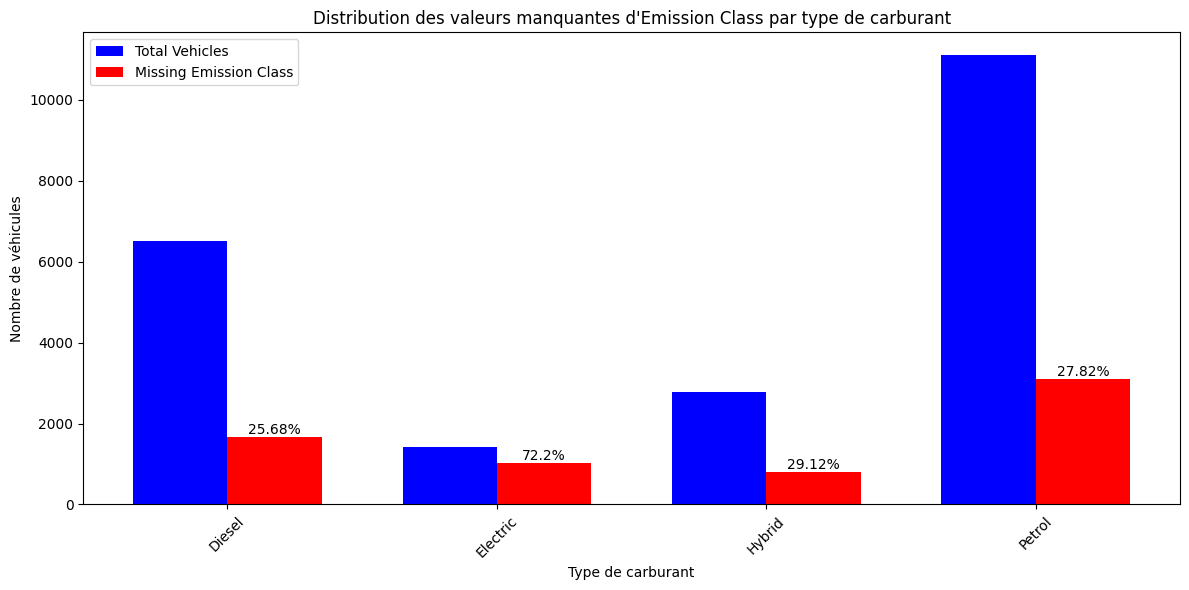


Statistiques des valeurs manquantes par type de carburant:
          Total  NaN_Count  NaN_Percentage
Fuel                                      
Diesel     6514       1673           25.68
Electric   1421       1026           72.20
Hybrid     2768        806           29.12
Petrol    11115       3092           27.82


In [42]:
# Créer DataFrame avec comptage des NaN
nan_by_fuel = pd.DataFrame({
    'Total': data_cleaned.groupby('Fuel').size(),
    'NaN_Count': data_cleaned[data_cleaned['Emission_class'].isna()].groupby('Fuel').size()
})

nan_by_fuel['NaN_Percentage'] = (nan_by_fuel['NaN_Count'] / nan_by_fuel['Total'] * 100).round(2)

# Visualisation
plt.figure(figsize=(12, 6))

# Créer barres groupées
x = np.arange(len(nan_by_fuel.index))
width = 0.35

plt.bar(x - width/2, nan_by_fuel['Total'], width, label='Total Vehicles', color='blue')
plt.bar(x + width/2, nan_by_fuel['NaN_Count'], width, label='Missing Emission Class', color='red')

# Personnalisation
plt.title('Distribution des valeurs manquantes d\'Emission Class par type de carburant')
plt.xlabel('Type de carburant')
plt.ylabel('Nombre de véhicules')
plt.xticks(x, nan_by_fuel.index, rotation=45)
plt.legend()

# Ajouter pourcentages au-dessus des barres
for i, v in enumerate(nan_by_fuel['NaN_Percentage']):
    plt.text(i + width/2, nan_by_fuel['NaN_Count'][i], f'{v}%', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Afficher statistiques
print("\nStatistiques des valeurs manquantes par type de carburant:")
print(nan_by_fuel)

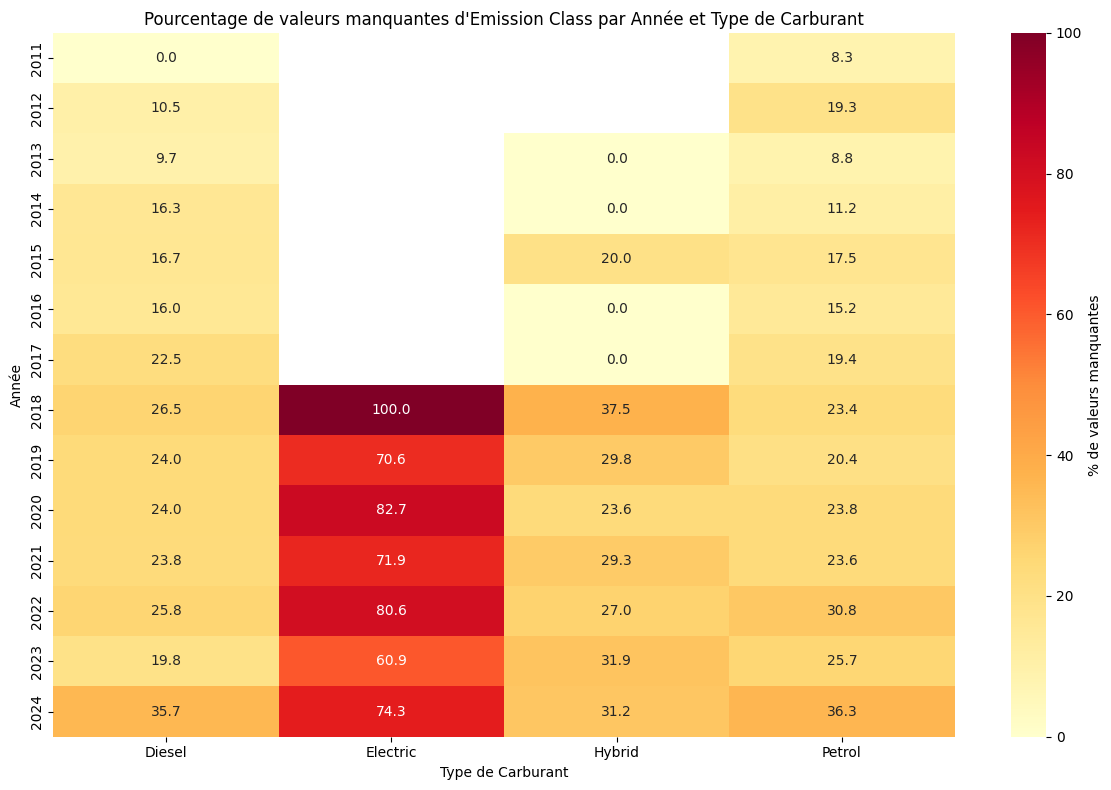


Nombre total de valeurs manquantes par type de carburant et année:
Fuel  Diesel  Electric  Hybrid  Petrol
Year                                  
2011     0.0       NaN     NaN     3.0
2012     2.0       NaN     NaN    11.0
2013     3.0       NaN     0.0     6.0
2014     8.0       NaN     0.0    10.0
2015    11.0       NaN     1.0    21.0
2016    16.0       NaN     0.0    25.0
2017    31.0       NaN     0.0    47.0
2018    76.0       1.0    18.0   113.0
2019   147.0      24.0    14.0   170.0
2020   315.0     105.0    76.0   283.0
2021   280.0     228.0   194.0   337.0
2022   139.0     174.0   120.0   313.0
2023   162.0     207.0   154.0   492.0
2024   483.0     287.0   229.0  1261.0


In [43]:
import seaborn as sns

# Créer DataFrame pour analyse
nan_matrix = pd.DataFrame({
    'Year': data_cleaned['Year'],
    'Fuel': data_cleaned['Fuel'],
    'Is_NaN': data_cleaned['Emission_class'].isna()
})

# Créer pivot table
nan_pivot = pd.pivot_table(
    nan_matrix,
    values='Is_NaN',
    index='Year',
    columns='Fuel',
    aggfunc='sum'
)

# Calculer pourcentages
total_counts = pd.pivot_table(
    nan_matrix,
    values='Is_NaN',
    index='Year',
    columns='Fuel',
    aggfunc='count'
)

nan_percentages = (nan_pivot / total_counts * 100).round(2)

# Visualisation
plt.figure(figsize=(12, 8))
sns.heatmap(nan_percentages, 
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': '% de valeurs manquantes'})

plt.title('Pourcentage de valeurs manquantes d\'Emission Class par Année et Type de Carburant')
plt.xlabel('Type de Carburant')
plt.ylabel('Année')
plt.tight_layout()
plt.show()

# Afficher statistiques
print("\nNombre total de valeurs manquantes par type de carburant et année:")
print(nan_pivot)

# Nettoyage des Données et Traitement des Valeurs Manquantes
Dans cette section, nous abordons le traitement des valeurs manquantes et la normalisation des données. Voici les étapes principales :
- Suppression des lignes/colonnes avec trop de valeurs manquantes.
- Imputation des valeurs manquantes par des moyennes ou des médianes adaptées.
- Standardisation et conversion des unités.


## Après l'analyse qu'on a fait au dessus on peut Traiter les Valeurs NaN de l'Emission_class depend de type de carburant et l'année de fabrication (On prend on considération la classe majoritaire):  

In [45]:
# Définir les carburants alternatifs
alternative_fuels = ['Electric']

# Afficher statistiques avant
print("Statistiques avant remplissage:")
for fuel in alternative_fuels:
    nan_count = data_cleaned[(data_cleaned['Fuel'] == fuel) & 
                            (data_cleaned['Emission_class'].isna())].shape[0]
    print(f"{fuel}: {nan_count} NaN")

# Remplir les NaN pour tous les carburants alternatifs
for fuel in alternative_fuels:
    data_cleaned.loc[(data_cleaned['Fuel'] == fuel) & 
                     (data_cleaned['Emission_class'].isna()), 
                     'Emission_class'] = 'Euro 6'

# Afficher statistiques après
print("\nStatistiques après remplissage:")
for fuel in alternative_fuels:
    print(f"\nDistribution pour {fuel}:")
    print(data_cleaned[data_cleaned['Fuel'] == fuel]['Emission_class'].value_counts())
    nan_count = data_cleaned[(data_cleaned['Fuel'] == fuel) & 
                            (data_cleaned['Emission_class'].isna())].shape[0]
    print(f"NaN restants: {nan_count}")

Statistiques avant remplissage:
Electric: 1026 NaN

Statistiques après remplissage:

Distribution pour Electric:
Emission_class
Euro 6          1223
Euro 6d           94
Euro 6d-TEMP      83
Euro 5            16
Euro 6c            4
Euro 4             1
Name: count, dtype: int64
NaN restants: 0


In [46]:
# Afficher nombre initial de NaN pour Petrol
print("Nombre initial de NaN pour véhicules Petrol:")
print(data_cleaned[(data_cleaned['Fuel'] == 'Petrol') & 
                   (data_cleaned['Emission_class'].isna())].shape[0])

# Fonction de mapping pour Petrol
def assign_petrol_emission(row):
    if row['Fuel'] == 'Petrol' and pd.isna(row['Emission_class']):
        year = row['Year']
        if year >= 2021:
            return 'Euro 6d'
        elif 2019 <= year <= 2020:
            return 'Euro 6d-TEMP'
        elif 2015 <= year <= 2018:
            return 'Euro 6'
        elif year <= 2014:
            return 'Euro 5'
    return row['Emission_class']

# Appliquer la fonction
data_cleaned['Emission_class'] = data_cleaned.apply(assign_petrol_emission, axis=1)

# Vérifier résultats
print("\nNombre de NaN restants pour véhicules Petrol:")
print(data_cleaned[(data_cleaned['Fuel'] == 'Petrol') & 
                   (data_cleaned['Emission_class'].isna())].shape[0])

# Afficher distribution finale
print("\nDistribution des classes d'émission pour Petrol:")
print(data_cleaned[data_cleaned['Fuel'] == 'Petrol']['Emission_class'].value_counts())

Nombre initial de NaN pour véhicules Petrol:
3092

Nombre de NaN restants pour véhicules Petrol:
0

Distribution des classes d'émission pour Petrol:
Emission_class
Euro 6d         5120
Euro 6          3512
Euro 6d-TEMP    2166
Euro 5           287
Euro 6c           22
Euro 4             8
Name: count, dtype: int64


In [47]:
# Afficher nombre initial de NaN pour Diesel
print("Nombre initial de NaN pour véhicules Diesel:")
print(data_cleaned[(data_cleaned['Fuel'] == 'Diesel') & 
                   (data_cleaned['Emission_class'].isna())].shape[0])

# Fonction de mapping pour Diesel
def assign_diesel_emission(row):
    if row['Fuel'] == 'Diesel' and pd.isna(row['Emission_class']):
        year = row['Year']
        if year in [2024, 2021] or (2015 <= year <= 2019):
            return 'Euro 6'
        elif year in [2023, 2022]:
            return 'Euro 6d'
        elif year == 2020:
            return 'Euro 6d-TEMP'
        elif year <= 2014:
            return 'Euro 5'
    return row['Emission_class']

# Appliquer la fonction
data_cleaned['Emission_class'] = data_cleaned.apply(assign_diesel_emission, axis=1)

# Vérifier résultats
print("\nNombre de NaN restants pour véhicules Diesel:")
print(data_cleaned[(data_cleaned['Fuel'] == 'Diesel') & 
                   (data_cleaned['Emission_class'].isna())].shape[0])


Nombre initial de NaN pour véhicules Diesel:
1673

Nombre de NaN restants pour véhicules Diesel:
0


In [50]:
# Afficher nombre initial de NaN pour Hybrid
print("Nombre initial de NaN pour véhicules Hybrid:")
print(data_cleaned[(data_cleaned['Fuel'] == 'Hybrid') & 
                   (data_cleaned['Emission_class'].isna())].shape[0])

# Fonction de mapping pour Hybrid
def assign_hybrid_emission(row):
    if row['Fuel'] == 'Hybrid' and pd.isna(row['Emission_class']):
        year = row['Year']
        if year == 2024 or year < 2019:
            return 'Euro 6'
        elif year in [2019, 2020]:
            return 'Euro 6d-TEMP'
        elif 2020 < year <= 2024:
            return 'Euro 6d'
    return row['Emission_class']

# Appliquer la fonction
data_cleaned['Emission_class'] = data_cleaned.apply(assign_hybrid_emission, axis=1)

# Vérifier résultats
print("\nNombre de NaN restants pour véhicules Hybrid:")
print(data_cleaned[(data_cleaned['Fuel'] == 'Hybrid') & 
                   (data_cleaned['Emission_class'].isna())].shape[0])


Nombre initial de NaN pour véhicules Hybrid:
0

Nombre de NaN restants pour véhicules Hybrid:
0


In [51]:
print(data_cleaned.isnull().sum())

Mileage                        0
Power                          0
Transmission                   0
Fuel                           0
Drive_type                     0
Make                           0
Body_color                     0
Interior_color                 0
Interior_material              0
Body                           0
Doors                          0
Seats                          0
CO2_emissions               3013
Engine_capacity             1548
Emission_class                 0
price                          0
Consumption_Standardized    3155
Year                           0
dtype: int64


In [ ]:
len(data_cleaned)

21986

 ## Nous effectuons un nettoyage des données en traitant les valeurs manquantes pour les colonnes `CO2_emissions`, `Engine_capacity` et `Consumption_Standardized` de manière méthodique. Voici les étapes détaillées :
### 1. Remplissage des Valeurs Manquantes pour `CO2_emissions` Nous utilisons une méthode d'imputation en deux étapes pour combler les valeurs manquantes de `CO2_emissions` : 
- **Groupe par `Fuel` et `Power` :** Nous remplaçons les valeurs manquantes par la médiane de chaque groupe (`Fuel`, `Power`).
- **Fallback Général par `Fuel` :** Pour les valeurs encore manquantes, nous utilisons la médiane de chaque groupe `Fuel`.

In [ ]:
# 1. More general grouping for CO2_emissions
data_cleaned['CO2_emissions'] = data_cleaned['CO2_emissions'].fillna(
    data_cleaned.groupby(['Fuel', 'Power'])['CO2_emissions'].transform('median')
)
# Final fallback for CO2_emissions
data_cleaned['CO2_emissions'] = data_cleaned['CO2_emissions'].fillna(
    data_cleaned.groupby(['Fuel'])['CO2_emissions'].transform('median')
)

# 2. Broader categories for Engine_capacity
data_cleaned['Engine_capacity'] = data_cleaned['Engine_capacity'].fillna(
    data_cleaned.groupby(['Make', 'Body'])['Engine_capacity'].transform('median')
)
# Final fallback for Engine_capacity
data_cleaned['Engine_capacity'] = data_cleaned['Engine_capacity'].fillna(
    data_cleaned.groupby(['Make'])['Engine_capacity'].transform('median')
)

# 3. Fill Consumption_Standardized using power ranges
data_cleaned['power_range'] = pd.qcut(data_cleaned['Power'], q=5)
data_cleaned['Consumption_Standardized'] = data_cleaned['Consumption_Standardized'].fillna(
    data_cleaned.groupby(['Fuel', 'power_range'])['Consumption_Standardized'].transform('median')
)
# Remove temporary column
data_cleaned = data_cleaned.drop('power_range', axis=1)

# Final fallback - global medians for any remaining NaN
final_columns = ['CO2_emissions', 'Engine_capacity', 'Consumption_Standardized']
data_cleaned[final_columns] = data_cleaned[final_columns].fillna(
    data_cleaned[final_columns].median()
)

# Verify results
print("\nFinal missing values check:")
print(data_cleaned[final_columns].isnull().sum())


Final missing values check:
CO2_emissions               0
Engine_capacity             0
Consumption_Standardized    0
dtype: int64


C:\Users\Iliass\AppData\Local\Temp\ipykernel_17520\315450440.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cleaned.groupby(['Fuel', 'power_range'])['Consumption_Standardized'].transform('median')


In [ ]:
len(data_cleaned)

21986

# On load the cleaned data on a CSV file

In [52]:
data_cleaned.to_csv('Carvago_cleaned.csv', index=False)